# Set up

In [1]:
from imutils import paths
import requests
import cv2
import os
from os import listdir
from os.path import isfile, join

import numpy as np
import keras
from keras import backend as K
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model

from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/Users/DavidMcNeill1/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/DavidMcNeill1/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/DavidMcNeill1/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/DavidMcNeill1/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/DavidMcNeill1/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  ret

In [2]:
train_path = "santa-notsanta/train"
valid_path = "santa-notsanta/valid"
test_path = "santa-notsanta/test"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['santa', 'notsanta'], batch_size=12)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['santa', 'notsanta'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['santa', 'notsanta'], batch_size=45)


Found 96 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [4]:
# plot images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(imgs)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
# the row of images displays an 'encoding'
imgs, labels = next(train_batches)

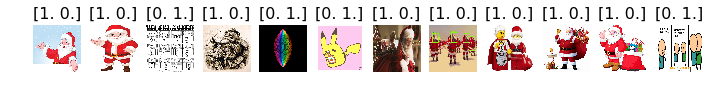

In [38]:
plots(imgs, titles=labels)

# Build and train CNN

In [39]:
# NOT using functional API
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(), # to 1 dimension
    Dense(2, activation='softmax'),
])

In [40]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# "fits the model on data generated batch by batch by Image Data Generator"
# steps = size of data set / batch size
model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=13, epochs=5, verbose=2)

Epoch 1/5
 - 3s - loss: 7.6586 - acc: 0.5208 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 3s - loss: 7.7233 - acc: 0.5208 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 3s - loss: 7.7233 - acc: 0.5208 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 3s - loss: 7.7233 - acc: 0.5208 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 3s - loss: 7.7233 - acc: 0.5208 - val_loss: 8.0590 - val_acc: 0.5000


# Predict

/Users/DavidMcNeill1/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


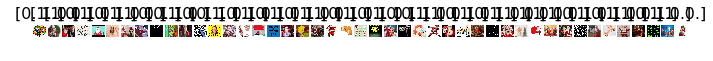

In [57]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [58]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.], dtype=float32)

In [59]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

/Users/DavidMcNeill1/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [60]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [61]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [23]:
# function from scikit learn
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    #---
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting 'normalize=True'.
    #---
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, w/o normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, w/o normalization
[[ 0 19]
 [ 0 26]]


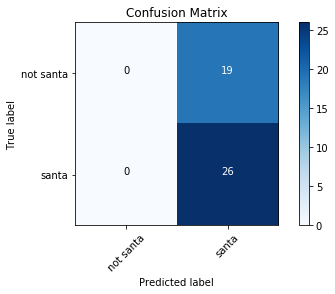

In [67]:
cm_plot_labels = ['not santa', 'santa']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

# Transfer Learning VGG19 model

In [6]:
base_model = VGG19(weights='imagenet')

In [7]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
type(base_model)

keras.engine.training.Model

In [9]:
model = Sequential()
for layer in base_model.layers[:-1]:
    model.add(layer)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [11]:
for layer in model.layers:
    layer.trainable = False

In [12]:
model.add(Dense(2, activation="softmax"))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

# Train the fine-tuned VGG19 model

In [14]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=13, epochs=5, verbose=2)

Epoch 1/5
 - 49s - loss: 0.8375 - acc: 0.6771 - val_loss: 1.0177 - val_acc: 0.5769
Epoch 2/5
 - 50s - loss: 0.5829 - acc: 0.7708 - val_loss: 0.8916 - val_acc: 0.5962
Epoch 3/5
 - 48s - loss: 0.4137 - acc: 0.8229 - val_loss: 0.7933 - val_acc: 0.6538
Epoch 4/5
 - 48s - loss: 0.3295 - acc: 0.8646 - val_loss: 0.7248 - val_acc: 0.7115
Epoch 5/5
 - 48s - loss: 0.2457 - acc: 0.8958 - val_loss: 0.6757 - val_acc: 0.7500


# Predict using fine-tuned VGG19 model

/Users/DavidMcNeill1/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


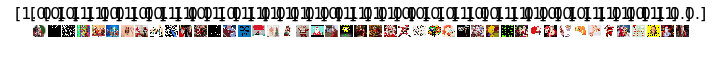

In [18]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [19]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.], dtype=float32)

In [20]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

/Users/DavidMcNeill1/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [21]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, w/o normalization
[[16  3]
 [ 2 24]]


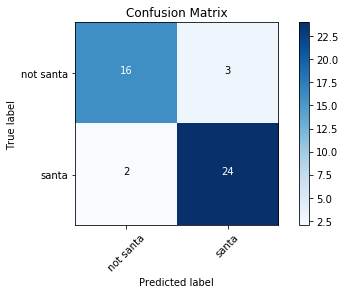

In [25]:
cm_plot_labels = ['not santa', 'santa']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')